<a href="https://colab.research.google.com/github/malur1703/Finance_data_analysis/blob/main/Finance_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Preparing data for analysis**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Bank_Personal_Loan_Modelling.xlsx to Bank_Personal_Loan_Modelling.xlsx


In [ ]:
import io
df = pd.read_excel(io.BytesIO(uploaded['Bank_Personal_Loan_Modelling.xlsx']),1)
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
df.shape

(5000, 14)

In [ ]:
##Checking for null values
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
#Removing ID and Zipcode as they may not be needed
df.drop(['ID','ZIP Code'],axis=1,inplace=True)

In [ ]:
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

**Visualise distribution of data**

In [ ]:
##check if there is skewness in data 
df.skew()

##Income has high positive outliers while age and experience are equally distributed

Age                  -0.029341
Experience           -0.026325
Income                0.841339
Family                0.155221
CCAvg                 1.598457
Education             0.227093
Mortgage              2.104002
Personal Loan         2.743607
Securities Account    2.588268
CD Account            3.691714
Online               -0.394785
CreditCard            0.904589
dtype: float64

In [ ]:
df.dtypes

Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3ec9ce8f10>,
      dtype=object)

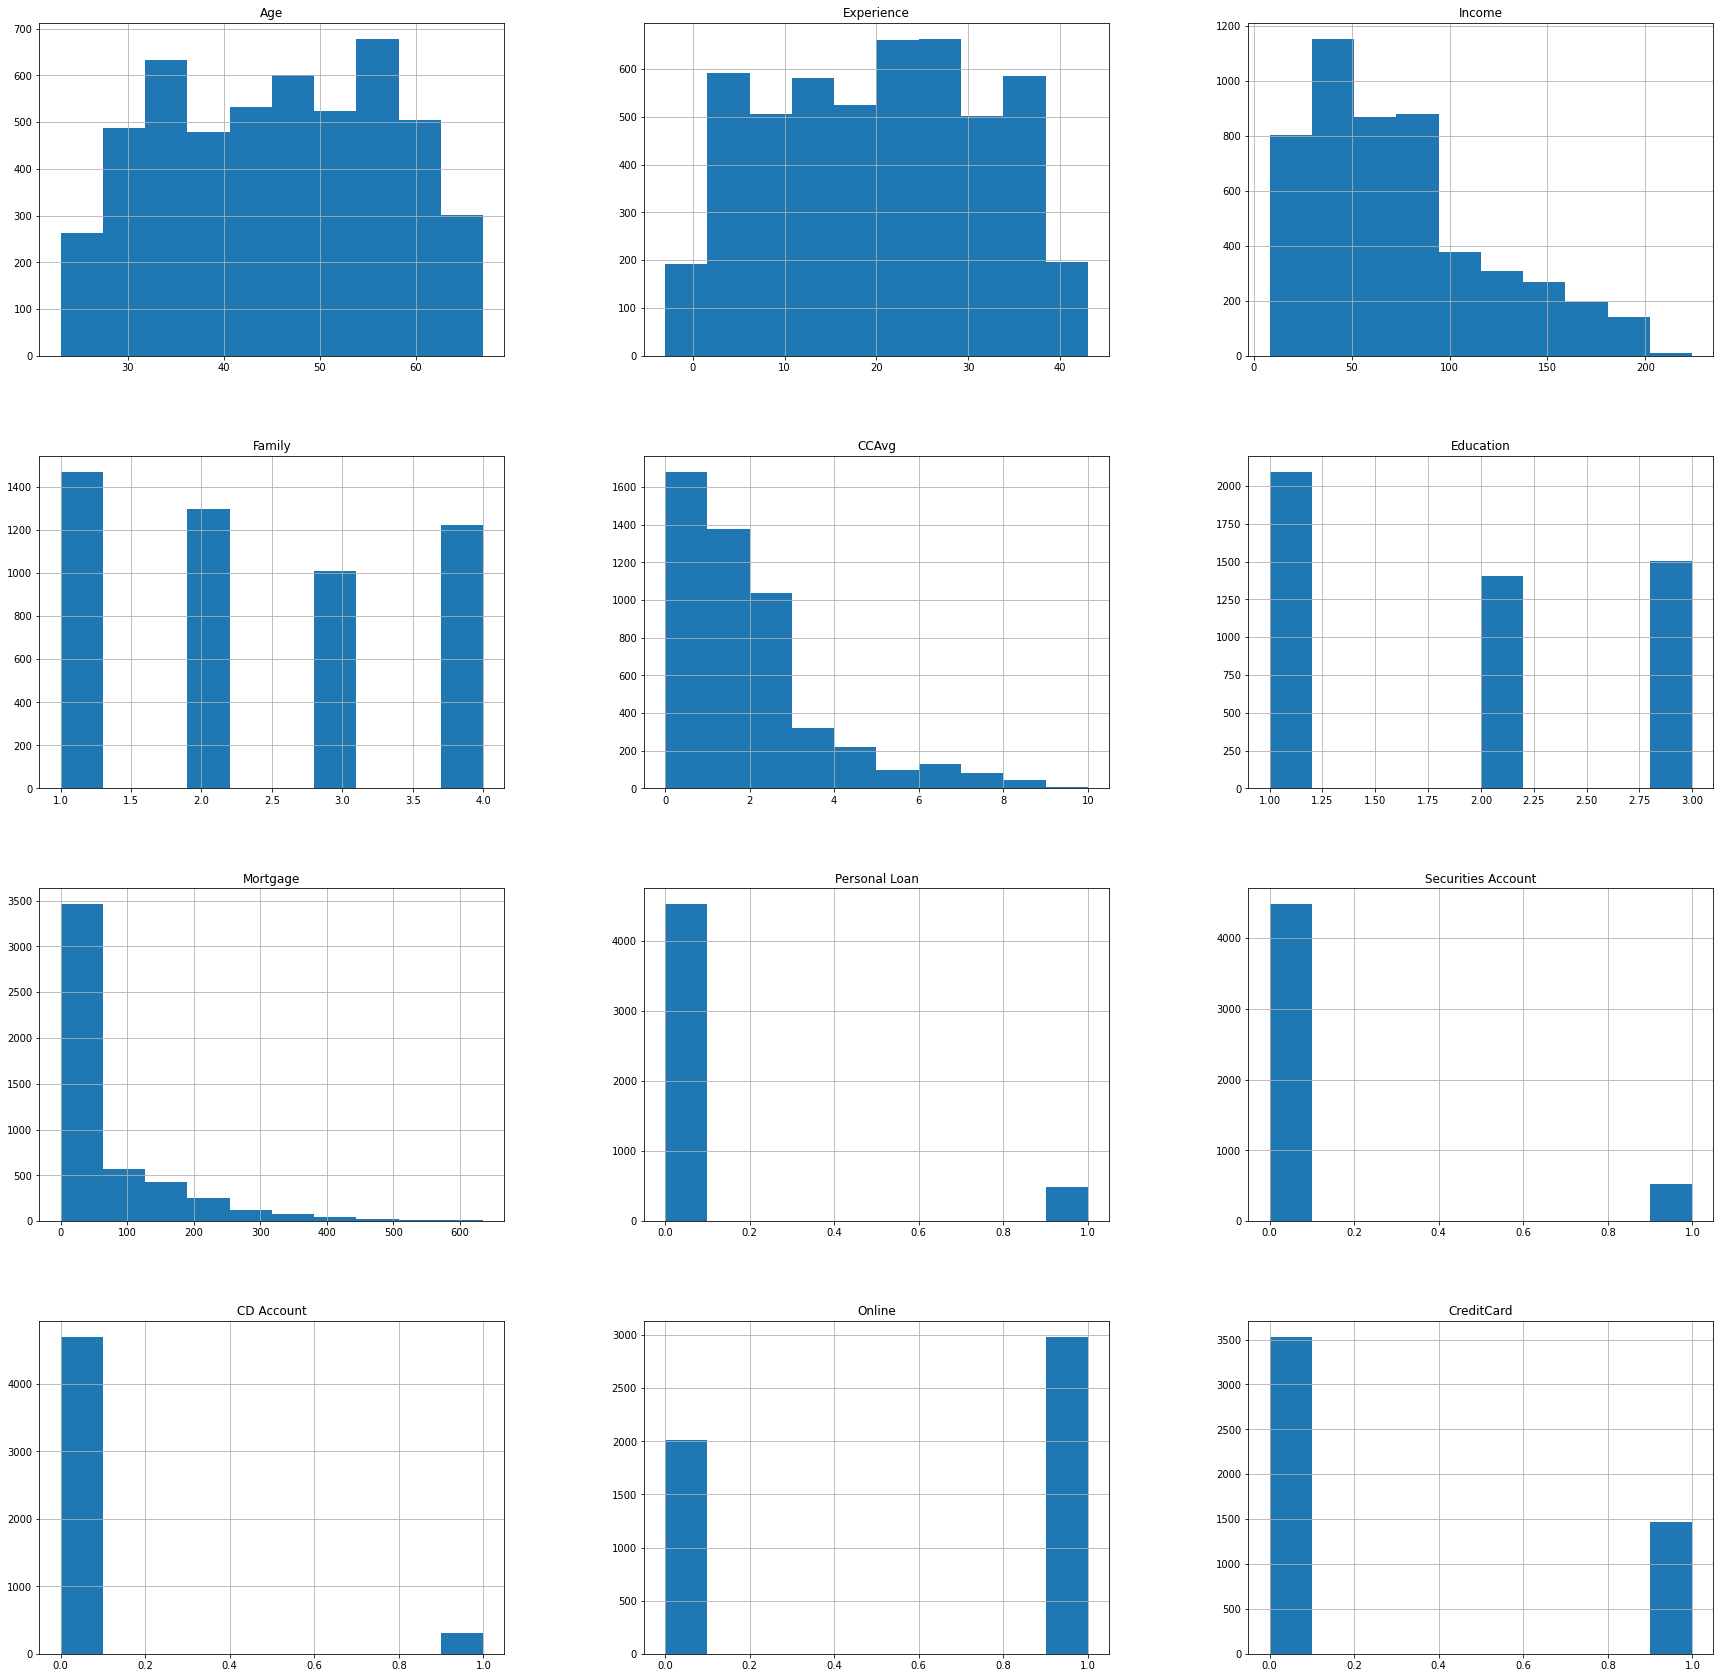

In [ ]:
df.hist(figsize=(30,30))

**Conclusion:**

To an extent age and experience are equally distributed.

Income & Credit card spending are skewed to the right.

Many customers have enabled online banking.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



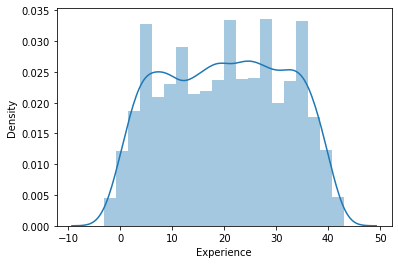

In [ ]:
sns.distplot(df['Experience'])

##Showing negative experience

In [ ]:
df['Experience'].mean()

20.1046

In [ ]:
Negative_exp=df[df['Experience']<0]
Negative_exp.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,25,-1,113,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,4,0.20,1,0,0,0,0,1,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



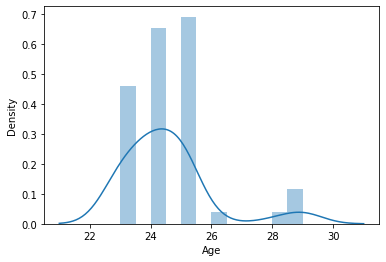

In [ ]:
sns.distplot(Negative_exp['Age'])

##people aged between 20 to 30 are listed as having negative experience

In [ ]:
Negative_exp['Experience'].mean()

-1.4423076923076923

In [ ]:
Negative_exp.size

624

In [ ]:
print('There are {} records which has negative values for experience, approx {} %'.format(Negative_exp.size , ((Negative_exp.size/df.size)*100)))

There are 624 records which has negative values for experience, approx 1.04 %


In [ ]:
data=df.copy()

In [ ]:
data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [ ]:
##using numpy where function to change the negative values to mean value derived from data with the same age group
data['Experience']=np.where(data['Experience']<0,data['Experience'].mean(),data['Experience'])

In [ ]:
##Checking for negative experience
data[data['Experience']<0]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


**Ananlysing correlation between different parameters**

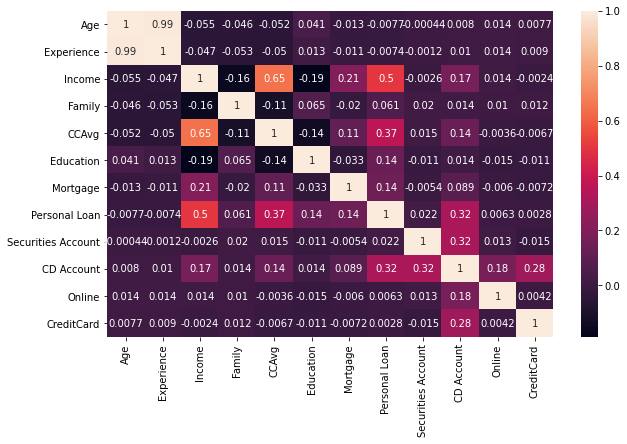

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

**Conclusion:** Age and Experience are very strongly correlated.

In [ ]:
##droping Experience to avoid multi-colinearity issue.
data=data.drop(['Experience'],axis=1)

In [ ]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


**Analysing education status of customers applying for loan**

In [ ]:
data['Education'].unique()
##1-UG
##2-Graduate
##3-Professional/Advanced

array([1, 2, 3])

In [ ]:
def mark(x):
    if x==1:
        return 'Undergrad'
    elif x==2:
        return 'Graduate'
    else:
        return 'Advanced/Professional'

In [ ]:
data['Edu_mark']=data['Education'].apply(mark)

In [ ]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Edu_mark
0,25,49,4,1.6,1,0,0,1,0,0,0,Undergrad
1,45,34,3,1.5,1,0,0,1,0,0,0,Undergrad
2,39,11,1,1.0,1,0,0,0,0,0,0,Undergrad
3,35,100,1,2.7,2,0,0,0,0,0,0,Graduate
4,35,45,4,1.0,2,0,0,0,0,0,1,Graduate


In [ ]:
EDU_dis=data.groupby('Edu_mark')['Age'].count()

In [ ]:
EDU_dis

Edu_mark
Advanced/Professional    1501
Graduate                 1403
Undergrad                2096
Name: Age, dtype: int64

In [ ]:
fig=px.pie(data,values=EDU_dis, names=EDU_dis.index,title='Pie Chart')
fig.show()

**Conclusion:** We have more undergraduates(41.92%) than graduates(28.06%) and Advanced/Professional(30.02.

**Analysing account holder distribution**

In [ ]:
def Security_CD(row):
    if (row['Securities Account']==1) & (row['CD Account']==1):
        return 'Holds Securites & Deposit'
    elif (row['Securities Account']==0) & (row['CD Account']==0):
        return 'Does not Holds Securites or Deposit'
    elif (row['Securities Account']==1) & (row['CD Account']==0):
        return ' Holds only Securites '
    elif (row['Securities Account']==0) & (row['CD Account']==1):
        return ' Holds only Deposit'

In [ ]:
data['Account_holder_category']=data.apply(Security_CD,axis=1)

In [ ]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Edu_mark,Account_holder_category
0,25,49,4,1.6,1,0,0,1,0,0,0,Undergrad,Holds only Securites
1,45,34,3,1.5,1,0,0,1,0,0,0,Undergrad,Holds only Securites
2,39,11,1,1.0,1,0,0,0,0,0,0,Undergrad,Does not Holds Securites or Deposit
3,35,100,1,2.7,2,0,0,0,0,0,0,Graduate,Does not Holds Securites or Deposit
4,35,45,4,1.0,2,0,0,0,0,0,1,Graduate,Does not Holds Securites or Deposit


In [ ]:
values=data['Account_holder_category'].value_counts()
values.index

Index(['Does not Holds Securites or Deposit', ' Holds only Securites ',
       ' Holds only Deposit', 'Holds Securites & Deposit'],
      dtype='object')

In [ ]:
fig=px.pie(data,values=values, names=values.index,title='Pie Chart')
fig.show()

**Conclusion:**Alomst 87% of customers do not hold any securities or deposit, and 3 % hold both securities as well as deposit. 

**Analyse customers based on education, personal loan and income status**

In [ ]:
data.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'Edu_mark', 'Account_holder_category'],
      dtype='object')

In [ ]:
px.box(data,x='Education',y='Income',facet_col='Personal Loan')

**Conclusion:**

We could say that Income of customers who availed personal loan are almost same irrescpective of their education.

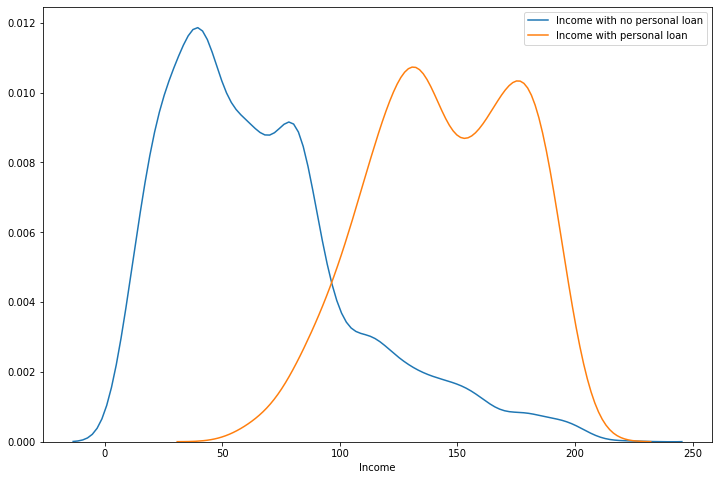

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(data[data['Personal Loan']==0]['Income'],hist=False,label='Income with no personal loan')
sns.distplot(data[data['Personal Loan']==1]['Income'],hist=False,label='Income with personal loan')
plt.legend()

**Conclusion:**  Customers who have availed personal loans seem to have higher income than those who do not have availed personal loans.

In [ ]:
##automating
def plot(col1,col2,label1,label2,title):
    plt.figure(figsize=(12,8))
    sns.distplot(data[data[col2]==0][col1],hist=False,label=label1)
    sns.distplot(data[data[col2]==1][col1],hist=False,label=label2)
    plt.legend()
    plt.title(title)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



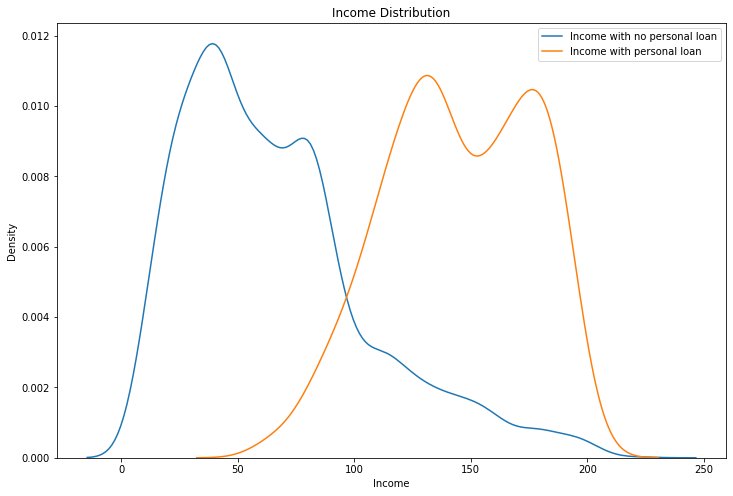

In [ ]:
plot('Income','Personal Loan','Income with no personal loan','Income with personal loan','Income Distribution')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



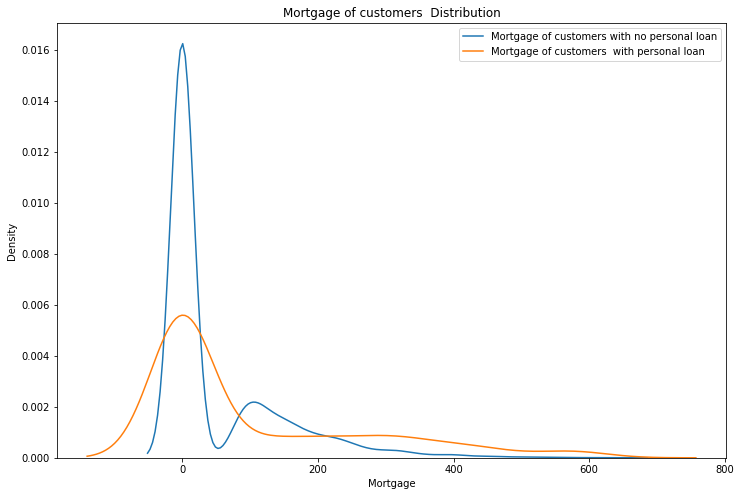

In [ ]:
plot('Mortgage','Personal Loan','Mortgage of customers with no personal loan','Mortgage of customers  with personal loan','Mortgage of customers  Distribution')

**Conclusion:** People with high mortgage value, i.e more than 400K have availed personal loans.

**Analyse customers based on different attributes**

In [ ]:
col_names=['Securities Account','Online','Account_holder_category','CreditCard']

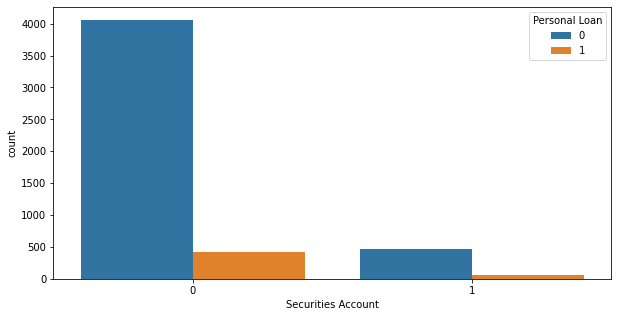

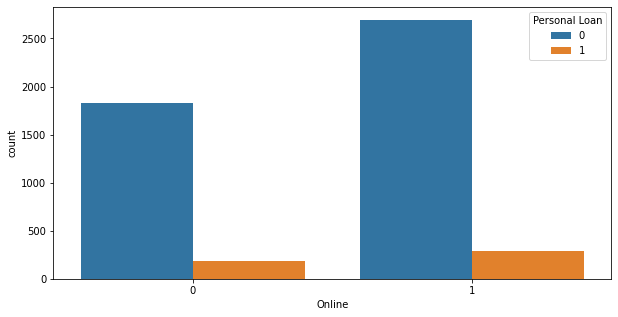

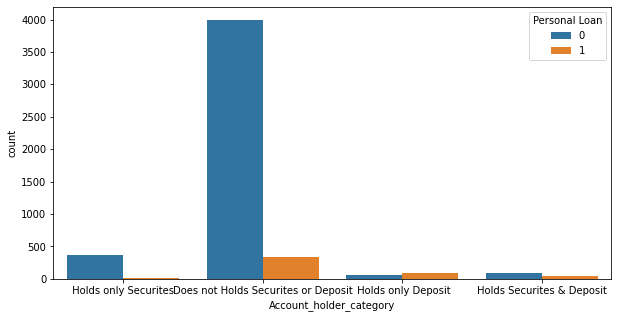

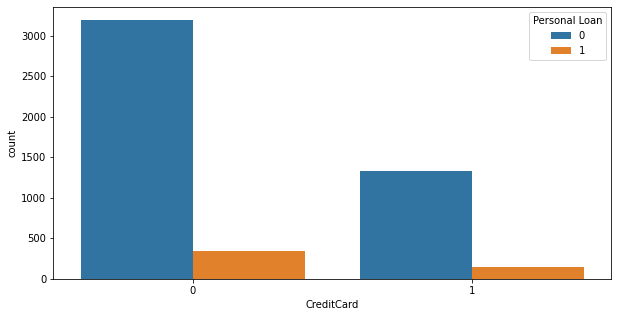

In [ ]:
for i in col_names:
    plt.figure(figsize=(10,5))
    sns.countplot(x=i,hue='Personal Loan',data=data)

**Conclusion:** Customers who hold deposit account & customers who do not hold either a securities account or deposit account have availed personal loan.

**Hypothesis Testing**

How is age of a person going to be a factor in availing loan ?

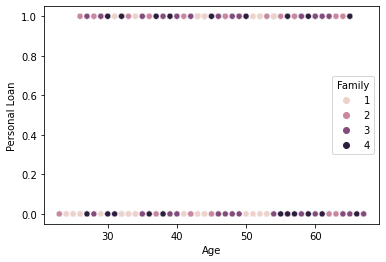

In [ ]:
sns.scatterplot(x=data['Age'],y=data['Personal Loan'],hue=data['Family'])

In [ ]:
import scipy.stats as stats

In [ ]:
Ho='Age does not have impact on availing personal loan'
Ha='Age does  have impact on availing personal loan'

In [ ]:
Age_no=np.array(data[data['Personal Loan']==0]['Age'])
Age_yes=np.array(data[data['Personal Loan']==1]['Age'])

In [ ]:
t,p_value=stats.ttest_ind(Age_no,Age_yes,axis=0)
if p_value<0.05:
    print(Ha,' as the p_value is less than 0.05 with a value of {}'.format(p_value))
else:
    print(Ho,' as the p_value is greater than 0.05 with a value of {}'.format(p_value))

Age does not have impact on availing personal loan  as the p_value is greater than 0.05 with a value of 0.584959263705325


In [ ]:
##Automting
def Hypothesis(col1,col2,HO,Ha):
    arr1=np.array(data[data[col1]==0][col2])
    arr2=np.array(data[data[col1]==1][col2])
    t,p_value=stats.ttest_ind(arr1,arr2,axis=0)
    if p_value<0.05:
        print('{}, as the p_value is less than 0.05 with a value of {}'.format(Ha,p_value))
    else:
        print('{} as the p_value is greater than 0.05 with a value of {}'.format(HO,p_value))

In [ ]:
Hypothesis('Personal Loan','Age',HO='Age does not have impact on availing personal loan',Ha='Age does  have impact on availing personal loan')

Age does not have impact on availing personal loan as the p_value is greater than 0.05 with a value of 0.584959263705325


Does income of a person have a significant impact on availing personal loan?

In [ ]:
Hypothesis(col1='Personal Loan',col2='Income',HO='Income does not have impact on availing personal loan',Ha='Income does  have impact on availing personal loan')

Income does  have impact on availing personal loan, as the p_value is less than 0.05 with a value of 0.0


Does number of persons in the family have a significant impact on availing personal loan?

In [ ]:
Hypothesis('Personal Loan','Family',HO='AgFamily does not have impact on availing personal loan',Ha='Family does  have impact on availing personal loan')

Family does  have impact on availing personal loan, as the p_value is less than 0.05 with a value of 1.4099040685673807e-05
